## Project 4: West Nile Virus Prediction
------------------------------------------------------------------------------------------------------------------------
## Part 1c. Spray data EDA & Cleaning
Group 2 (Edmund, Marc, Mingzi, Rohazeanti), SG DSIF5 

## Table of Contents
- [Importing the libraries](#Importing-the-libraries)
- [Importing the datasets](#Importing-the-datasets)
- [Inspect Data](#Inspect-Data)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

### Importing the libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calmap

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Importing the datasets

In [17]:
train = pd.read_csv('data/train.csv')
spray = pd.read_csv('data/spray.csv')

### Inspect Data

In [18]:
#basic eda
def basic_eda(df, df_name):
    print("-----",df_name.upper(), "-----\n")
    print(f"Rows: {df.shape[0]} \t Columns: {df.shape[1]}\n")
    print(f"Total null rows: {df.isnull().sum().sum()}")
    print(f"Percentage of null rows: {round(df.isnull().sum().sum() / df.shape[0] * 100, 2)}% \n")
    print(f"Total duplicate rows: {df[df.duplicated(keep=False)].shape[0]}")
    print(f"Percentage of duplicated rows: {round(df[df.duplicated(keep=False)].shape[0] / df.shape[0] * 100, 2)}% \n")
    print(df.info())
    print("\n")
    
#find min and max date
def min_max_date(df):
    print("Earliest record: ", df.Date.min(),
      "\nLatest Record: ", df.Date.max())

In [19]:
dfs = [
    (train, 'train'),
    (spray, 'spray')]

[basic_eda(df, name) for df, name in dfs]

----- TRAIN -----

Rows: 10506 	 Columns: 12

Total null rows: 0
Percentage of null rows: 0.0% 

Total duplicate rows: 1062
Percentage of duplicated rows: 10.11% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non

[None, None]

In [20]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [10]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


#### Exploratory Data Analysis

In [11]:
spray['Date'].unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

In [12]:
spray['Time']

0        6:56:58 PM
1        6:57:08 PM
2        6:57:18 PM
3        6:57:28 PM
4        6:57:38 PM
            ...    
14830    8:34:11 PM
14831    8:35:01 PM
14832    8:35:21 PM
14833    8:35:31 PM
14834    8:35:41 PM
Name: Time, Length: 14835, dtype: object

We have spraying data for ten different dates in 2011 and 2013. Spraying occurred in the evenings between 7pm and 9pm.

In [13]:
# Check rows with null values - 584 rows with Time having Null Values
spray[spray.isnull().any(axis=1)]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


In [14]:
#Check duplicated rows - does duplicated means number of times sprayed?
spray[spray.duplicated(keep=False)]

,Date,Time,Latitude,Longitude
484,2011-09-07,7:43:40 PM,41.983917,-87.793088
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
489,2011-09-07,7:44:32 PM,41.986460,-87.794225
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
...,...,...,...,...
1025,2011-09-07,7:44:32 PM,41.986460,-87.794225
1026,2011-09-07,7:44:32 PM,41.986460,-87.794225
1027,2011-09-07,7:44:32 PM,41.986460,-87.794225
1028,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [15]:
spray_dup = spray.groupby(['Latitude', 'Longitude'], as_index=False).count().sort_values('Date', ascending=False)
spray_dup.head()

,Latitude,Longitude,Date,Time
11853,41.986460,-87.794225,541,541
11499,41.983917,-87.793088,2,2
0,41.713925,-87.615892,1,1
9533,41.959113,-87.719752,1,1
9522,41.959028,-87.728890,1,1


C:\Users\rohaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


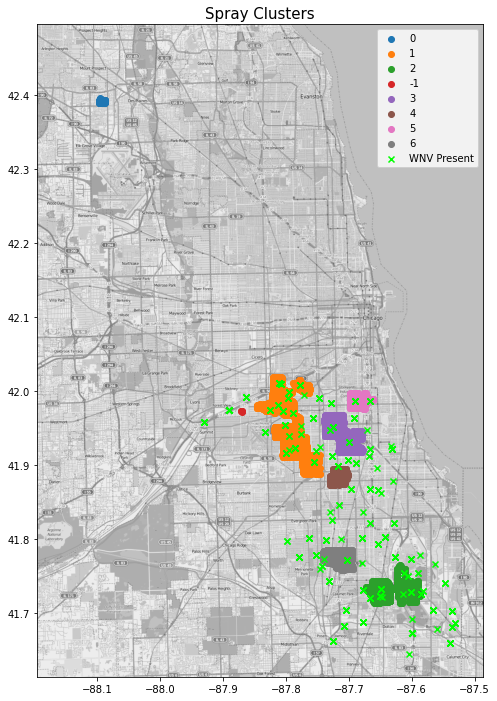

In [29]:
from sklearn.cluster import DBSCAN, KMeans
mapdata = np.loadtxt('mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt')  #use map data 

#use DBSCAN to cluster spray data to use to create spray cluster feature
X_spray = spray[['Latitude', 'Longitude']] #isolate lat long data
spray_cluster_model = DBSCAN(eps=.01, min_samples=20).fit(X_spray) #run DBSCAN (parameters set after multiple iterations)
X_spray['cluster'] = spray_cluster_model.labels_ #create cluster feature 

#set dimensions of plot
lon_lat_box_spray = (X_spray['Longitude'].min()-.1, X_spray['Longitude'].max()+.1, X_spray['Latitude'].min()-.1,X_spray['Latitude'].max()+.1)

#create plot of spray clusters, for loop allows for legend to represent clusters 
fig, ax = plt.subplots(figsize=(8,12))
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box_spray) 

#iterate through each cluster value and plot points in the same figure (maintains lables)
for i in X_spray['cluster'].unique():  
    ax.scatter(X_spray[X_spray['cluster'] == i]['Longitude'], 
               X_spray[X_spray['cluster'] == i]['Latitude'], 
               label=i, marker='o')

#overlay WNV presence
plt.scatter(train[train['WnvPresent'] == 1]['Longitude'], 
            train[train['WnvPresent'] == 1]['Latitude'], 
            marker='x', label='WNV Present', color='lime')

plt.legend()
plt.title('Spray Clusters', size=15);

C:\Users\rohaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


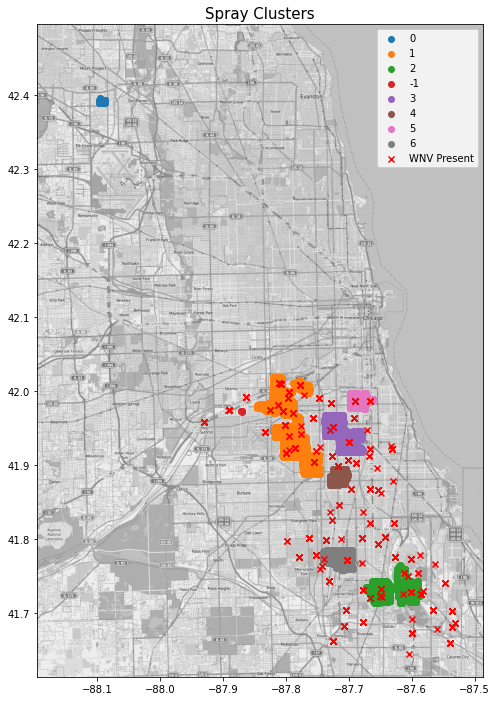

In [30]:
from sklearn.cluster import DBSCAN, KMeans
mapdata = np.loadtxt('mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt')  #use map data 

#use DBSCAN to cluster spray data to use to create spray cluster feature
X_spray = spray[['Latitude', 'Longitude']] #isolate lat long data
spray_cluster_model = DBSCAN(eps=.01, min_samples=20).fit(X_spray) #run DBSCAN (parameters set after multiple iterations)
X_spray['cluster'] = spray_cluster_model.labels_ #create cluster feature 

#set dimensions of plot
lon_lat_box_spray = (X_spray['Longitude'].min()-.1, X_spray['Longitude'].max()+.1, X_spray['Latitude'].min()-.1,X_spray['Latitude'].max()+.1)

#create plot of spray clusters, for loop allows for legend to represent clusters 
fig, ax = plt.subplots(figsize=(8,12))
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box_spray) 

#iterate through each cluster value and plot points in the same figure (maintains lables)
for i in X_spray['cluster'].unique():  
    ax.scatter(X_spray[X_spray['cluster'] == i]['Longitude'], 
               X_spray[X_spray['cluster'] == i]['Latitude'], 
               label=i, marker='o')

#overlay WNV presence
plt.scatter(train[train['WnvPresent'] == 1]['Longitude'], 
            train[train['WnvPresent'] == 1]['Latitude'], 
            marker='x', label='WNV Present', color='r')


plt.legend()
plt.title('Spray Clusters', size=15);

Not necessary to plot trap in the graph because for same trap location, there will be virus present and not present depending on the date.

In [31]:
train[train['Trap']=='T002']

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
25,2007-06-05,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,3,0
26,2007-06-05,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,5,0
27,2007-06-05,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10164,2013-09-12,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,32,1
10302,2013-09-19,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,4,0
10303,2013-09-19,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,23,0
10414,2013-09-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,5,0


In [32]:
def get_ymd(df): # Create 3 new columns: year, month, day from the Date column
    df['year'] = [dd.year for dd in pd.DatetimeIndex(df.Date.values)]
    df['month'] = [dd.month for dd in pd.DatetimeIndex(df.Date.values)]
    df['day'] = [dd.day for dd in pd.DatetimeIndex(df.Date.values)]
    df['week']= [dd.week for dd in pd.DatetimeIndex(df.Date.values)]
    return df

def make_datetime(df): # Convert the Date into datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    df = get_ymd(df)
    df.sort_values(by='Date',ascending=True,inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df

In [33]:
spray_date = make_datetime(spray)

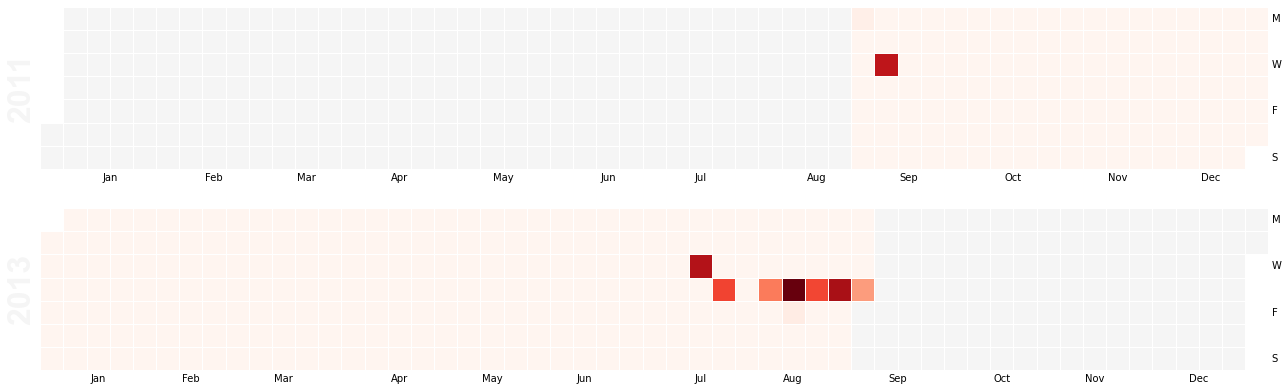

In [34]:
# In which dates the spray was applied
days = spray_date.Date.values
events = pd.Series(np.ones(len(days)), index=days)
fig=calmap.calendarplot(events,daylabels='MTWTFSS',monthticks=1,
                        dayticks=[0, 2, 4, 6],
                        yearlabels=True, 
                        yearascending=True,
                        fig_kws={'figsize':(18,6)})

We have only 10 days to data available for mosquito spray. Out of those days only one day sprayed in 2011 and rest of the 9 days are in 2013. There is no data availble in other years.

We will not use spray data for modelling because:
   1. Spray data is only available for 2011 and 2013
   2. No data is available in the time frame where we need to predict the presence of WNV

In [35]:
# Save cleaned spray to pickle file
spray.to_pickle('./data/spray_final.pkl')